In [14]:
# Install a pip package in the current Jupyter kernel
import sys
sys.path.append('../wdtools')
#sys.path.append('../corv/src')

### General
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from tqdm import tqdm
import pandas as pd

### Tools
from astropy.io import fits
import wdtools
import data_selector as ds
import corv

#corv.sdss.make_catalogs()

In [15]:
corvmodel = corv.models.make_balmer_model(names = ['a'])

In [16]:
###### lines = [6562.79, 4861.35, 4340.47, 4101.73, 3970.07, 3889.06, 3835.40, 5893]

catalog = ds.get_catalog('data/catalog_sdss4.csv')
catalog = catalog.drop(8)
catalog.reset_index(inplace=True, drop=True)
#ds.plot_binary_spectra(catalog, lines, 'sdss4')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 71.70it/s]


In [17]:
print(catalog)

    Unnamed: 0         solution_id1         solution_id2           source_id1  \
0            0  1636042515805110273  1636042515805110273   743097619303531904   
1            1  1636042515805110273  1636042515805110273   617887567299257600   
2            2  1636042515805110273  1636042515805110273  3846979117283617152   
3            3  1636042515805110273  1636042515805110273  2534148150521389440   
4            4  1636042515805110273  1636042515805110273  2534260777448123520   
5            5  1636042515805110273  1636042515805110273  1261421999231535616   
6            6  1636042515805110273  1636042515805110273  2688215052700206976   
7            7  1636042515805110273  1636042515805110273  4030722598505336192   
8            9  1636042515805110273  1636042515805110273  3264871552432918528   
9           10  1636042515805110273  1636042515805110273  3928724924885805568   
10          11  1636042515805110273  1636042515805110273   676167219784728576   
11          12  163604251580

In [18]:
absorb = pd.read_csv('data/absorbtionlines.csv')
relevants = ['H', 'He', 'Mg', 'Fe', 'Ca', 'Na']

In [20]:
rvs1, e_rvs1 = [], []
rvs2, e_rvs2 = [], []

wd_pos = [1,2,1,1,2,1,2,2,2,2,2,2,2]
ms_pos = [2,1,2,2,1,2,1,1,1,1,1,1,1]

lines = {'HI' : 6562.79, 'HII' : 4861.35, 'HIII' : 4340.47,
         'NaI' : 5893, 'MgI' : 5175, 'FeI' : 4383}

spectral_types = {'O' : ['H', 'HeI', 'HeII'],
                  'B' : ['H', 'HeI'],
                  'A' : ['H', 'CaII'],
                  'F' : ['H', 'CaII', 'Fe', 'Na'],
                  'G' : [],
                  'K' : [],
                  'M' : [],
                  'WD' : []}

for i in range(len(catalog)):
    line = 'NaI'
    
    sp = wdtools.SpecTools()

    h_alpha = 6562.79
    na_alpha = 5893
    
    if wd_pos[i] == 1:
        line1 = lines['HI']
        line2 = lines[line]
    else:
        line1 = lines[line]
        line2 = lines['HI']
        
    rv1, e_rv1 = sp.get_line_rv(catalog['wavelength1'][i], catalog['flux1'][i], catalog['ivar1'][i], centroid = line1,
                              distance = 100, edge = 15,
                              nmodel = 2, plot = False)
    rv2, e_rv2 = sp.get_line_rv(catalog['wavelength2'][i], catalog['flux2'][i], catalog['ivar2'][i], centroid = line2,
                              distance = 100, edge = 15,
                              nmodel = 2, plot = False)
        
    rvs1.append(rv1)
    e_rvs1.append(e_rv1)
    rvs2.append(rv2)
    e_rvs2.append(e_rv2)

In [21]:
na_good_fit = [0,0,0,0,0,0,1,1,1,0,1,1,0]

na_rvs = pd.DataFrame({'rv1' : rvs1, 'e_rv1' : e_rvs1, 'rv2' : rvs2, 'e_rv2' : e_rvs2, 'grav_redshift' : np.abs(np.array(rvs1) - np.array(rvs2)), 'consistent' : na_good_fit})

In [22]:
rvs1, e_rvs1 = [], []
rvs2, e_rvs2 = [], []

for i in range(len(catalog)):
    line = 'FeI'
    
    sp = wdtools.SpecTools()

    h_alpha = 6562.79
    na_alpha = 5893
    
    if wd_pos[i] == 1:
        line1 = lines['HI']
        line2 = lines[line]
    else:
        line1 = lines[line]
        line2 = lines['HI']
        
    rv1, e_rv1 = sp.get_line_rv(catalog['wavelength1'][i], catalog['flux1'][i], catalog['ivar1'][i], centroid = line1,
                              distance = 100, edge = 15,
                              nmodel = 2, plot = False)
    rv2, e_rv2 = sp.get_line_rv(catalog['wavelength2'][i], catalog['flux2'][i], catalog['ivar2'][i], centroid = line2,
                              distance = 100, edge = 15,
                              nmodel = 2, plot = False)
        
    rvs1.append(rv1)
    e_rvs1.append(e_rv1)
    rvs2.append(rv2)
    e_rvs2.append(e_rv2)

In [23]:
mg_good_fit = [0,0,0,0,0,0,1,1,1,0,1,1,0]

mg_rvs = pd.DataFrame({'rv1' : rvs1, 'e_rv1' : e_rvs1, 'rv2' : rvs2, 'e_rv2' : e_rvs2, 'grav_redshift' : np.abs(np.array(rvs1) - np.array(rvs2)), 'consistent' : mg_good_fit})

In [24]:
print(na_rvs)
print(mg_rvs)

           rv1       e_rv1         rv2       e_rv2  grav_redshift  consistent
0   100.000000   13.454545 -368.686869  129.414141     468.686869           0
1   344.444444   18.181818  130.303030   15.313131     214.141414           0
2   134.343434   12.121212  253.535354  687.878788     119.191919           0
3   700.000000  419.676768   69.696970    2.828283     630.303030           0
4    75.757576   88.282828  265.656566  106.181818     189.898990           0
5    33.333333  609.414141  475.757576  465.616162     442.424242           0
6    59.595960    3.030303  102.020202   14.626263      42.424242           1
7    13.131313   23.393939  -31.313131   50.828283      44.444444           1
8    59.595960    9.090909   67.676768   22.707071       8.080808           1
9    19.191919   17.171717  714.141414  272.363636     694.949495           0
10  207.070707   45.777778  182.828283   50.828283      24.242424           1
11   83.838384  306.626263  150.505051   24.404040      66.66666

['rv2', 'rv1', 'rv2', 'rv2', 'rv1', 'rv2', 'rv1', 'rv1', 'rv1', 'rv1', 'rv1', 'rv1', 'rv1']
[1100.0, 1100.0, 817.171717171717, -102.0202020202021, -663.6363636363636, 952.5252525252523, 138.38383838383825, 1100.0, 1100.0, 158.58585858585857, -621.2121212121212, 689.8989898989898, -180.8080808080809]


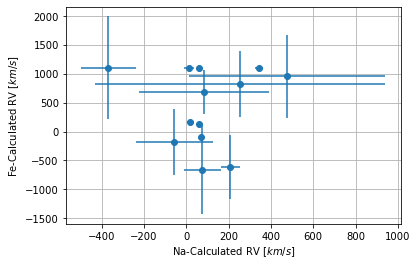

In [25]:
ms_addr = []
for i in ms_pos:
    ms_addr.append('rv{}'.format(ms_pos[i]))
print(ms_addr)

na_ms_rv = [na_rvs[ms_addr[i]][i] for i in range(len(ms_addr))]
na_ms_e_rv = [na_rvs['e_' + ms_addr[i]][i] for i in range(len(ms_addr))]
mg_ms_rv = [mg_rvs[ms_addr[i]][i] for i in range(len(ms_addr))]
mg_ms_e_rv = [mg_rvs['e_' + ms_addr[i]][i] for i in range(len(ms_addr))]

print(mg_ms_rv)

plt.errorbar(na_ms_rv, mg_ms_rv, xerr=na_ms_e_rv, yerr=mg_ms_e_rv, fmt='o')
#plt.xlim(-250, 500)
#plt.ylim(-250, 500)
plt.xlabel(r'Na-Calculated RV $[km/s]$')
plt.ylabel(r'Fe-Calculated RV $[km/s]$')
plt.grid()